# Tests sur le Transport Optimal

## Bibliothèque python POT 

Utilisation du module [Python Optimal Transport](https://pot.readthedocs.io/en/stable/), par Rémy Flamary.

In [1]:
import ot
import numpy as np
import matplotlib.pyplot as plt
import ot.plot

### Tests basiques

On définit a et b des distributions de probabilité, i.e. des vecteurs dont la somme des coefficients vaut 1.

In [2]:
a = np.array([0.25, 0.4, 0.15, 0.2])
b = np.array([0.25, 0.25, 0.25, 0.25])

On définit C la matrice de coût. Par simplicité, on considère que les coûts sont égaux à la distance entre les indices des coefficients.

In [3]:
M = np.array([[0,1,2,3],
              [1,0,1,2],
              [2,1,0,0],
              [3,2,1,0]
             ])

In [4]:
print(a,b)
print(M)

[0.25 0.4  0.15 0.2 ] [0.25 0.25 0.25 0.25]
[[0 1 2 3]
 [1 0 1 2]
 [2 1 0 0]
 [3 2 1 0]]


On calcule la distance de Wasserstein entre a et b selon M.

In [5]:
wasserstein_distance = ot.emd2(a,b,M)
print(wasserstein_distance)

0.15


On calcule la matrice du transport optimal.

In [6]:
ot_matrix = ot.emd(a,b,M)
print(ot_matrix)

[[0.25 0.   0.   0.  ]
 [0.   0.25 0.15 0.  ]
 [0.   0.   0.1  0.05]
 [0.   0.   0.   0.2 ]]


### Tests gaussiens

Taken from an [explanatory notebook](https://github.com/rflamary/POT/blob/master/notebooks/plot_OT_1D.ipynb) on the [ReadTheDocs documentation](https://pot.readthedocs.io/en/stable/).

In [7]:
#%% parameters

n = 100  # nb bins

# bin positions
x = np.arange(n, dtype=np.float64)

# Gaussian distributions
a = ot.datasets.make_1D_gauss(n, m=20, s=5)  # m= mean, s= std
b = ot.datasets.make_1D_gauss(n, m=60, s=10)

# loss matrix
M = ot.dist(x.reshape((n, 1)), x.reshape((n, 1)))
M /= M.max()

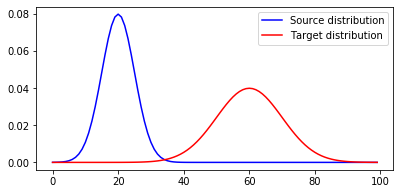

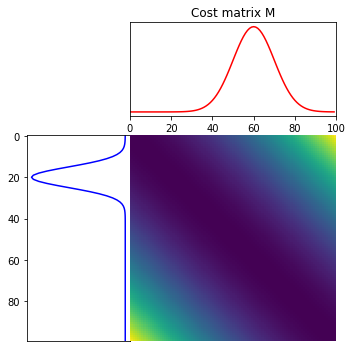

In [8]:
#%% plot the distributions

plt.figure(1, figsize=(6.4, 3))
plt.plot(x, a, 'b', label='Source distribution')
plt.plot(x, b, 'r', label='Target distribution')
plt.legend()

#%% plot distributions and loss matrix

plt.figure(2, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, M, 'Cost matrix M')

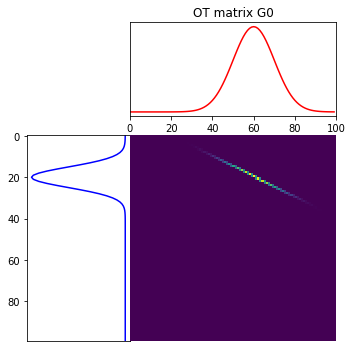

In [9]:
#%% EMD

G0 = ot.emd(a, b, M)

plt.figure(3, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, G0, 'OT matrix G0')

It.  |Err         
-------------------
    0|2.861463e-01|
   10|1.860154e-01|
   20|8.144529e-02|
   30|3.130143e-02|
   40|1.178815e-02|
   50|4.426078e-03|
   60|1.661047e-03|
   70|6.233110e-04|
   80|2.338932e-04|
   90|8.776627e-05|
  100|3.293340e-05|
  110|1.235791e-05|
  120|4.637176e-06|
  130|1.740051e-06|
  140|6.529356e-07|
  150|2.450071e-07|
  160|9.193632e-08|
  170|3.449812e-08|
  180|1.294505e-08|
  190|4.857493e-09|
It.  |Err         
-------------------
  200|1.822723e-09|
  210|6.839572e-10|


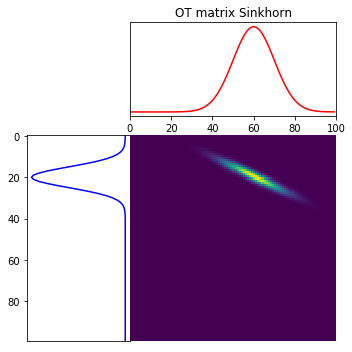

In [10]:
#%% Sinkhorn

lambd = 1e-3
Gs = ot.sinkhorn(a, b, M, lambd, verbose=True)

plt.figure(4, figsize=(5, 5))
ot.plot.plot1D_mat(a, b, Gs, 'OT matrix Sinkhorn')

plt.show()